Document link : http://tiny.cc/LogReg 

*Problem Statement**

The problem that we are going to solve here is that given a set of features that describe a claimant who is going to claim for the insurance amount, our machine learning model must predict whether the claimant will hire an attorney or not to run the case. To train our machine learning model with insurance data, we will be using [ClaimantsData](https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/claimants.csv)



In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/claimants.csv")
data.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


CASENUM : case number 

ATTORNEY : It is the O/P , 0 means not hiring an attorney 

CLMSEX : 0= male, 1= female 

CLMINSUR: 

SEATBELT : 0= not wearing , 1= wearing the belt

LOSS : ammount claimant want to claim

In [ ]:
data.shape

(1340, 7)

1340 --> rows
7-->column

In [ ]:
## Dropping the CASENUM column 
data.drop(['CASENUM'], axis=1, inplace=True)
data.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [ ]:
data.describe()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [ ]:
data.shape

(1340, 6)

In [ ]:
## Cheking for missing values
data.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [ ]:
# Imputing all the columns with mode --> mode will work with both numerical and categorical data

In [ ]:
data.CLMSEX.value_counts()   

1.0    742
0.0    586
Name: CLMSEX, dtype: int64

For checking the frequency we use value_counts(

In [ ]:
data.CLMSEX.value_counts().index[0]

1.0

In [ ]:
data.CLMINSUR.value_counts()

1.0    1179
0.0     120
Name: CLMINSUR, dtype: int64

In [ ]:
data.CLMINSUR.value_counts().index[0]

1.0

In [ ]:
## Imputing the missing values 
#data['CLMSEX'] = data['CLMSEX'].fillna
#data['CLMinsur'] = data['CLMINSUR'].fillna
# Instead of using this we are creating an user defined datatype for imputing the missing values

In [ ]:
# Creating a user-defined function for imputing the missing values
def fill_na(col):
  col.fillna(col.value_counts().index[0], inplace = True)
  return col 
data.apply(lambda col : fill_na(col))   # apply fun is gng to apply on the dataset
data.isnull().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

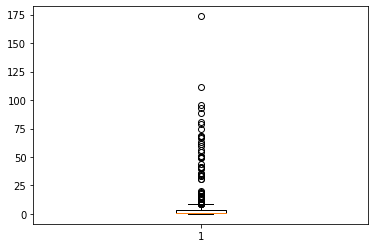

In [ ]:
## Loss column ## Datapoint < Q 
## Observing the outliers
plt.boxplot(data.LOSS)
plt.show()

### In some cases based on data 
### Outliers are considered as missing values 
###  Winsorization --> outliers are replaced with next small value
####Example : [1,2,3,4,5,6,76,87,77888]--->77888 as an outliers __> 77888 will be replaced with 87
### One analysis --> Including outliers
### one analysis --> drop all the outliers

In [ ]:
# Split the data into Input and Output
X = data.iloc[:,1:]
y = data.ATTORNEY


In [ ]:
# Split the data into trianing and testing 
from sklearn.model_selection import train_test_split
X_trian,X_test,y_train,y_test = train_test_split(X , y , test_size = 0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_trian , y_train)  # Input and output will be passes to th

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Predicting on training data
# Syntax : oblectName.predict(Input)
y_train_pred = reg.predict(X_trian)
y_train_pred

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,

In [ ]:
# Model performance 
from sklearn.metrics import confusion_matrix, accuracy_score
conf = confusion_matrix(y_train,y_train_pred)
conf

array([[309, 179],
       [109, 341]])

In [ ]:
conf[0][0]
conf[0][1]


179

In [ ]:
print('true_positive=',conf[0][0])
print('false_positive=', conf[0][1])
print('true_negative=' ,conf[1][0])
print('false_negative=' ,conf[1][1])

true_positive= 309
false_positive= 179
true_negative= 109
false_negative= 341


In [ ]:
true_positive=conf[0][0]
false_positive=conf[0][1]
true_negative=conf[1][0]
false_negative=conf[1][1]

In [ ]:
sns.heatmap(conf)

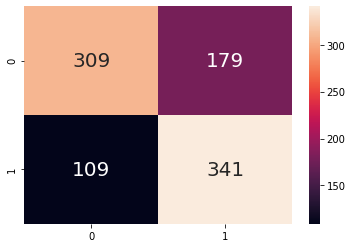

In [ ]:
sns.heatmap(confusion_matrix(y_train , y_train_pred), annot = True, fmt = '3.0f' , annot_kws={'size':'20'})

In [ ]:
## Accuracy --> TP + TN /TP + FP + TN + FN
## Correct Predictions / Total no.of predictions
( 309 + 341)/(309+169+109+341)

0.7004310344827587

In [ ]:
accuracy_score(y_train,y_train_pred)

0.6929637526652452

1--> Hiring an Attorney
0--> Not Hiring an Attorney

No.of False Positives 

In [ ]:
Precision = true_positive /(true_positive + false_positive)
Precision

0.6331967213114754

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_train,y_train_pred)

0.6557692307692308

In [ ]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.4753846153846154